In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

# test_size 기본값은 0.25래

VotingClassifier 보팅!

In [ ]:
from sklearn.ensemble import VotingClassifier

# VotiongClassifier은 그냥 통 안에 들어갈거 써주기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# VotingClassifier에 들어갈 모델들!

lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 개별 모델들을 소프트보팅 기반의 앙상블 모델로 구현하기!
vo_clf = VotingClassifier(
    estimators=[
      ("LR", lr_clf), # 이름 내맘대로지어주기가능
      ("KNN", knn_clf)
    ],
    voting='soft'
)


In [ ]:
vo_clf.fit(X_train, y_train)

score = vo_clf.score(X_test, y_test) # score 예측하고 점수확인 한번에!!
print("voting 분류기 정확도 : {:.4f}".format(score))

voting 분류기 정확도 : 0.9580


In [ ]:
from sklearn.metrics import accuracy_score

for estimator in vo_clf.estimators_:
  pred = estimator.predict(X_test)
  class_name= estimator.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9580
KNeighborsClassifier 정확도: 0.9301


# RandomForest

# Estimator의 결정 경계 확인

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y, ax):

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

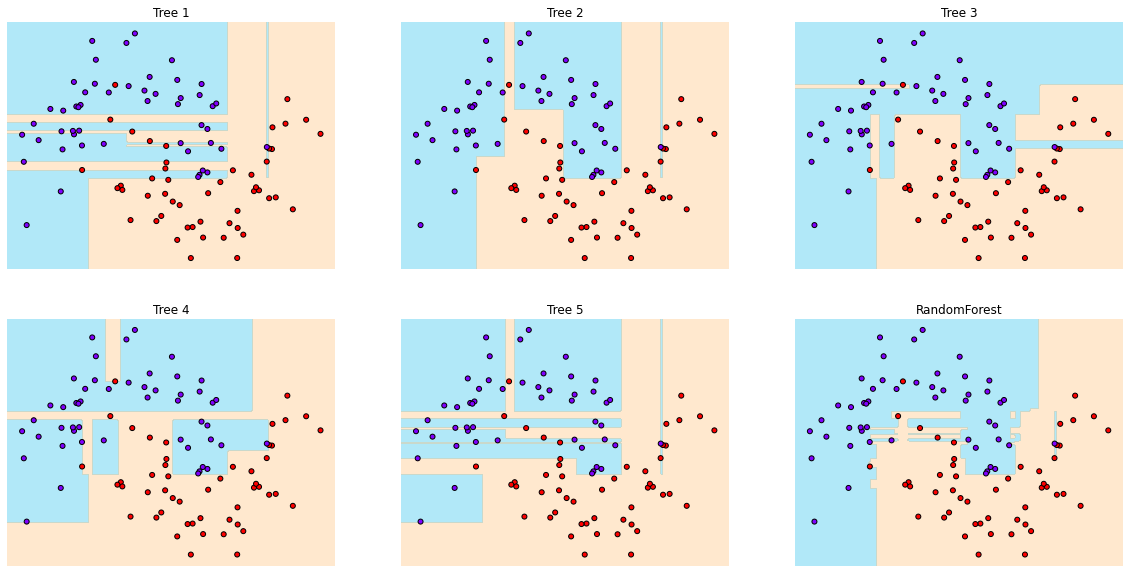

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i+1))
  visualize_boundary(tree, X, y, ax)

axes.ravel()[-1].set_title("RandomForest")
visualize_boundary(forest, X, y, axes.ravel()[-1])

plt.show()

# 유방암 데이터 확인

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [10, 100],
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 100]}, scoring='accuracy')

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.946019
1,100,0.957729


## 나무를 10개에서 100개로 늘림

In [ ]:
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(rf_grid_search.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', rf_grid_search.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.9577
GridSearchCV 최적 하이퍼 파라미터: {'n_estimators': 100}


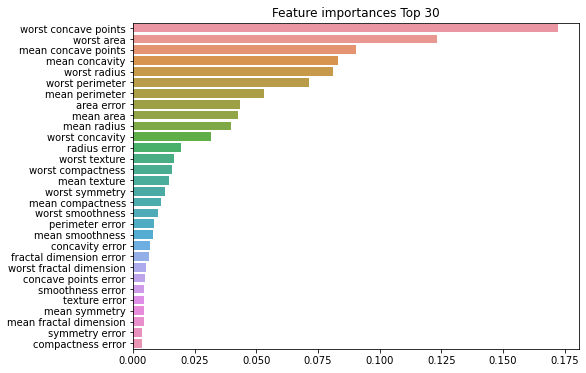

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(rf_grid_search.best_estimator_, X_train.columns)

# random forest의 특성중요도!⭐⭐⭐

In [ ]:
# DecisionTree를 만들어서
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_depth' : [8, 12, 16 ,20],
    'min_samples_split' : [16, 24],
}


tree_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

tree_grid_search.fit(X_train, y_train) # 훈련 꼭 시켜주기!!

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy')

In [ ]:
df = pd.DataFrame(tree_grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028345,0.017961,0.005583,0.005103,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.965116,0.917647,0.929412,0.905882,0.905882,0.924788,0.021971,1
1,0.022944,0.009678,0.007114,0.005243,8,24,"{'max_depth': 8, 'min_samples_split': 24}",0.965116,0.905882,0.929412,0.905882,0.905882,0.922435,0.023205,5
2,0.024430,0.006601,0.011110,0.004940,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.965116,0.917647,0.929412,0.905882,0.905882,0.924788,0.021971,1
3,0.014703,0.005593,0.003562,0.000334,12,24,"{'max_depth': 12, 'min_samples_split': 24}",0.965116,0.905882,0.929412,0.905882,0.905882,0.922435,0.023205,5
4,0.010565,0.003578,0.002490,0.000661,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.965116,0.917647,0.929412,0.905882,0.905882,0.924788,0.021971,1
5,0.007725,0.000532,0.001926,0.000054,16,24,"{'max_depth': 16, 'min_samples_split': 24}",0.965116,0.905882,0.929412,0.905882,0.905882,0.922435,0.023205,5
6,0.007924,0.000582,0.002068,0.000100,20,16,"{'max_depth': 20, 'min_samples_split': 16}",0.965116,0.917647,0.929412,0.905882,0.905882,0.924788,0.021971,1
7,0.007642,0.000530,0.001944,0.000121,20,24,"{'max_depth': 20, 'min_samples_split': 24}",0.965116,0.905882,0.929412,0.905882,0.905882,0.922435,0.023205,5


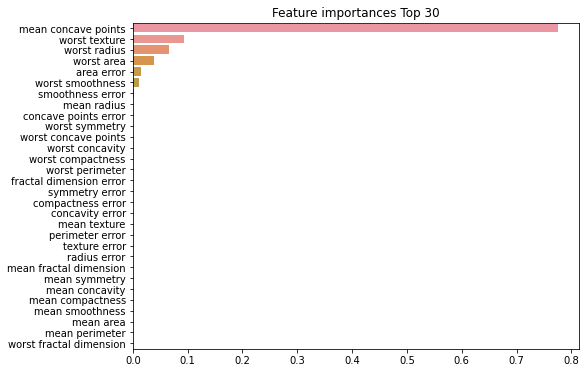

In [ ]:
best_tree = tree_grid_search.best_estimator_ # 모델! 베스트모델
plot_feature_importance(best_tree, X_train.columns)

# DecisionTree의 특성중요도⭐⭐⭐⭐
# 위에 RandomForest 특성중요도와 결과가 다름

해석
- DecisionTree 적은숫자 feature로 빨리빨리 뽑아내. 필요한 feature만 얼른얼른 걸러내는느낌

- RandomForest는 여러개의 feature를 사용하게해줌. 여러개의 tree들을 조합했기 때문에(앙상블했다) 데이터의 면면성을 최대한 많이 고려해줬다